# Bank marketing campaigns dataset analysis

### Feature description
**Bank client data:**
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

***Related with the last contact of the current campaign:***
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

***other attributes:***
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

***social and economic context attributes***
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) - may be related to cyclical employment variation
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric) - It is used to estimate the average variation between two given periods in the prices of products consumed by households. 
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) - an economic indicator that measures the degree of optimism that consumers have regarding the overall state of a country's economy and their own financial situations.
* 19 - euribor3m3m: euribor3m 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

***Output variable (desired target):***
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Abstract
This is dataset that describe Portugal bank marketing campaigns results. 
Conducted campaigns were based mostly on direct phone calls, offering  bank's clients to place a term deposit. 
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

Sourse of the data
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Dataset description
https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-data-set-description

**Citation Request:**
> This dataset is public available for research. The details are described in S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing." Decision Support Systems, Elsevier, 62:22-31, June 2014 <

### Task

* predicting the future results of marketing companies based on available statistics and, accordingly, formulating recommendations for such companies in the future.
* building a profile of a consumer of banking services (deposits).

In [1]:
# Import libraries 

# data manipulations
import pandas as pd
import numpy as np 

# disable showing long warnings
import warnings
warnings.filterwarnings("ignore")

# data visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
import seaborn as sns

### 1. Loading data

In [2]:
# Read data
data_path = '../data/term deposit data.csv'

data = pd.read_csv(filepath_or_buffer=data_path, sep=';')

print(f'There is {data.shape[0]} observations with {data.shape[1]} features')

display(data.head(5))
# display(data.dtypes)

There is 41188 observations with 21 features


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# data.isnull().sum()

In [4]:
# number of duplciated rows
print(f'There are {data.duplicated().sum()} duplicated rows as follows:')

# mask = data.duplicated(keep=False)
# data.loc[mask, :]

There are 12 duplicated rows as follows:


In [5]:
# drop duplicated values because it is more likely to be because of sampling error (it's very unlikely to have exactlt same 'duration')
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)

In [7]:
data.shape

(41176, 21)

### 1. Explore categorical features (EDA)

In [8]:
ratio = data.y.value_counts()
ratio


no     36537
yes     4639
Name: y, dtype: int64

Out of the total calls that are made, 11.3 % of them are successful.

In [9]:
# convert some numerical features to bin

age_bins = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data['age_grp'] = pd.cut(data['age'], bins = age_bins)

campaign_bins = [i for i in range(1, 57, 5)]
data['no_calls'] = pd.cut(data['campaign'], bins = campaign_bins)

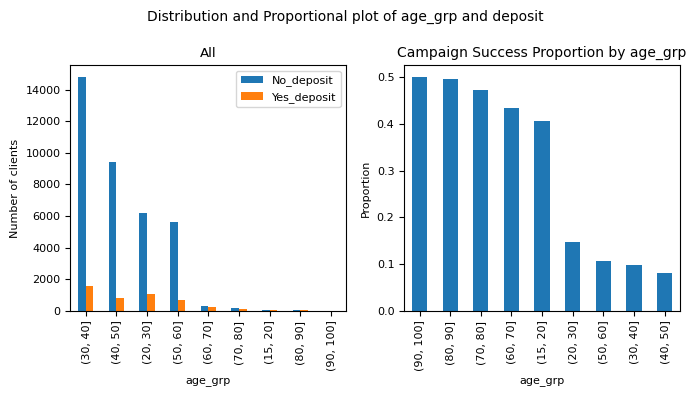

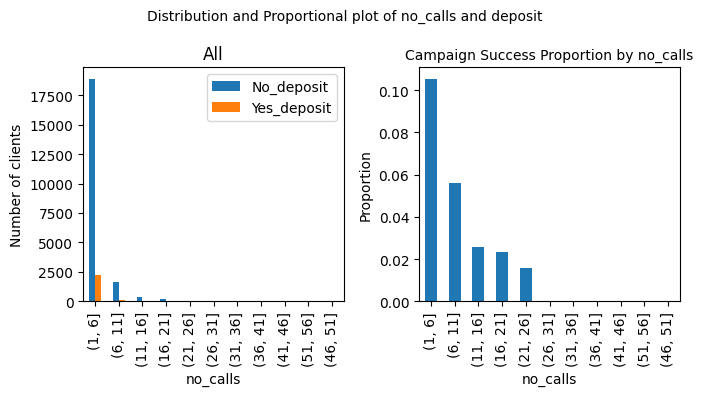

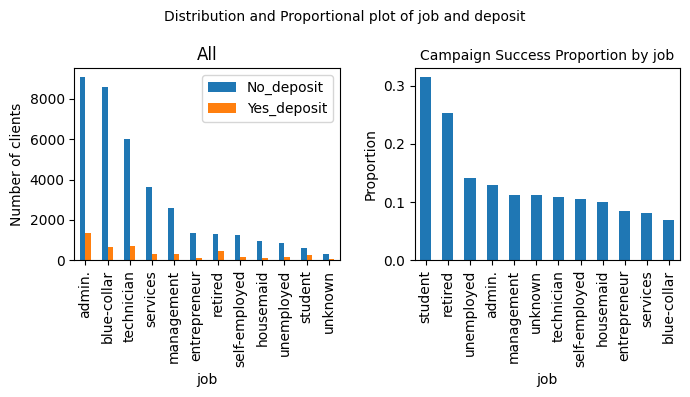

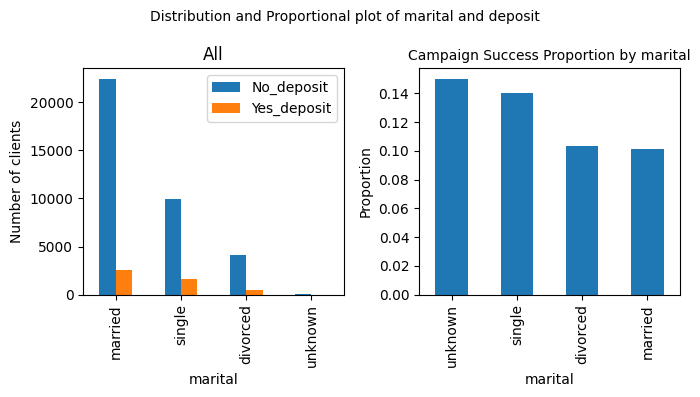

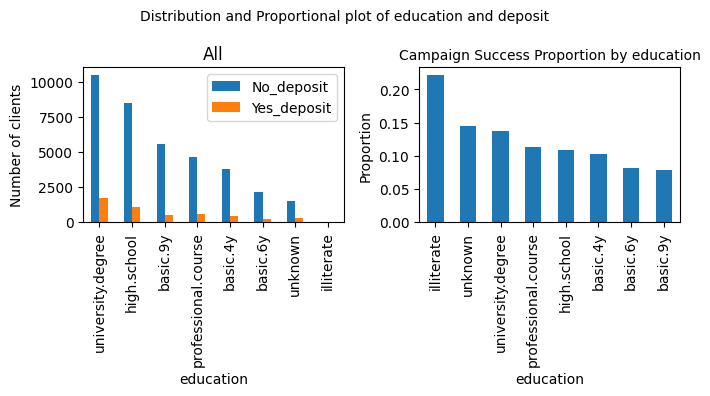

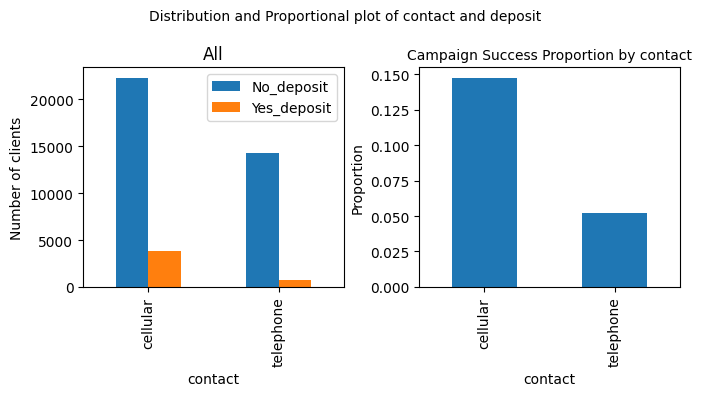

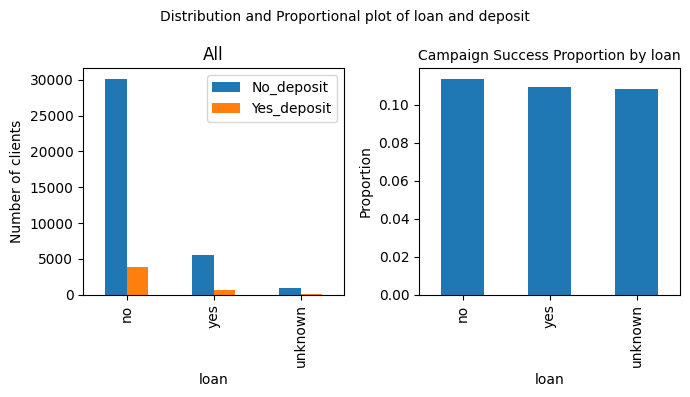

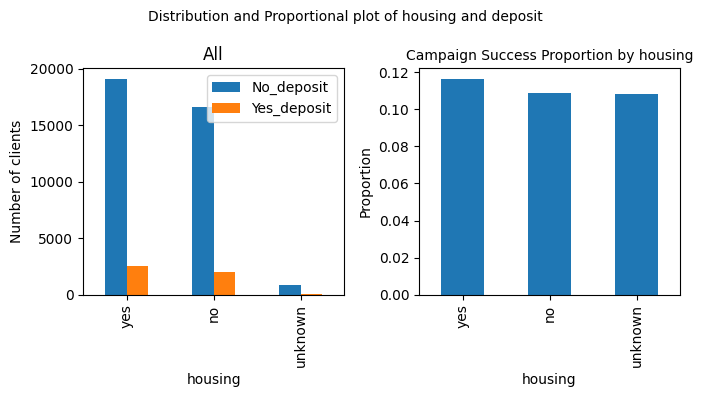

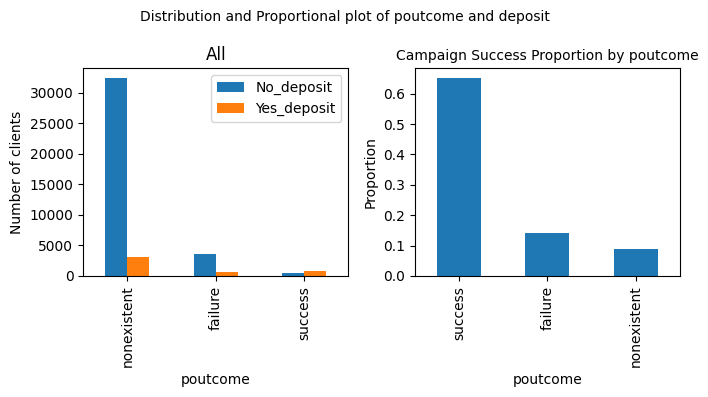

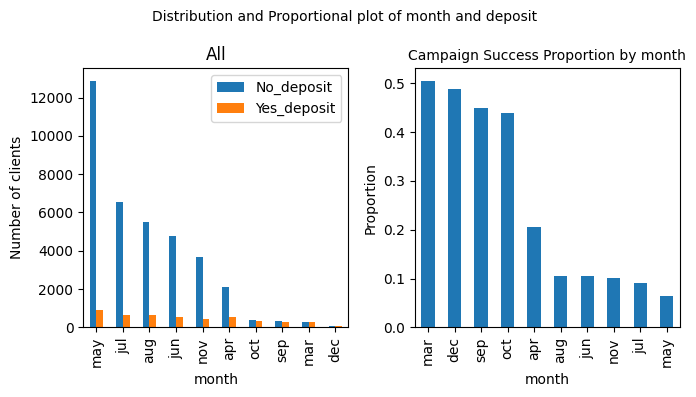

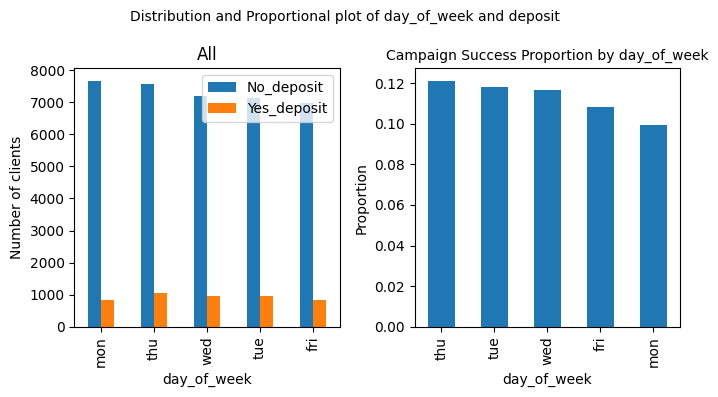

In [8]:
from utils import bar_plot

columns = ['age_grp', 'no_calls', 'job', 'marital', 'education', 'contact', 'loan', 'housing', 'poutcome', 'month', 'day_of_week']
bar_plot(data, columns, target='y', figsize=(7,4))

**Primary analysis of several categorical features reveals:**
- Although [97.5% of clients fall in age range of 20-60](#age-distribution), they are the ones who are least likely to open the account. Success rate for the calls is more for clients upto 20 and above 60 years of age.
- The probability of customer opening the account reduces far greatly as the number of calls increase. Infact, probability is almost zero after 26 calls. Probability after 11 calls is less than 3%.
- Data set is clearly imbalanced. We need to address this using undersamling, oversamling or data augmentation. 
- Administrative staff and technical specialists opened the deposit most of all. In relative terms, a high proportion of pensioners and students might be mentioned as well. Approximately 32% of students and 25% of retirees say 'yes' to open deposit account with the bank.
3. Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.
4. Cients with higher education (university degree) are more likely to subscribe.
5. Best communication channel is cellular.
6. Home ownership and having personal loan does not greatly affect marketing company performance.
7. Client who previously said yes in previous campains are more likely to say yes again. 65% of the people who agreed for previous campaign agreed for this campaign as well. That is a very significant number and certainly could be used by sales team to select target customers.
8. Bases on relative comparison, it seems it's more likely to get 'yes' during Oct to Dec. 
9. Day of week does not greatly affect marketing company performance.

### 2. Explore numerical features (EDA)

In [9]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

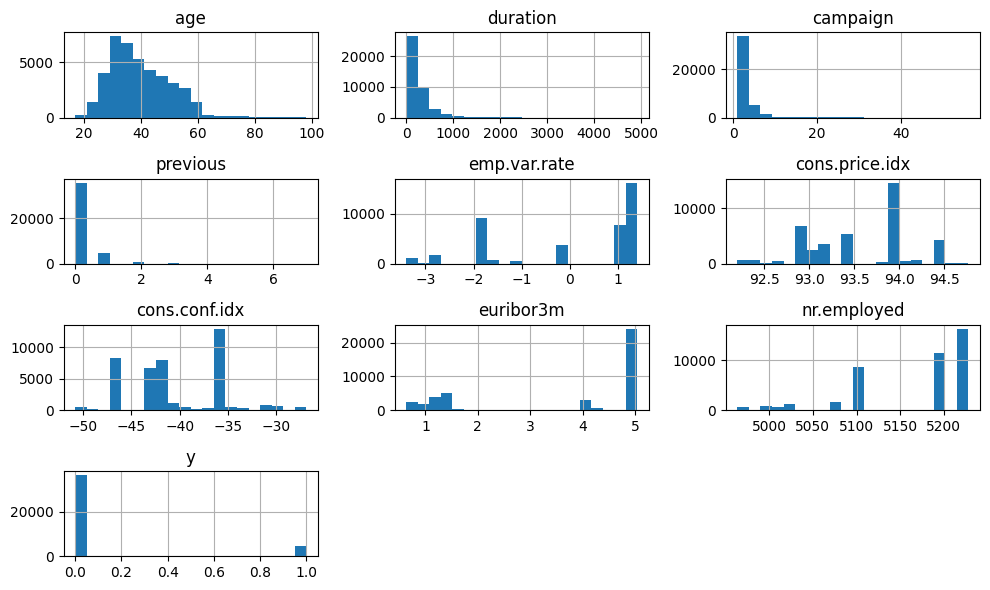

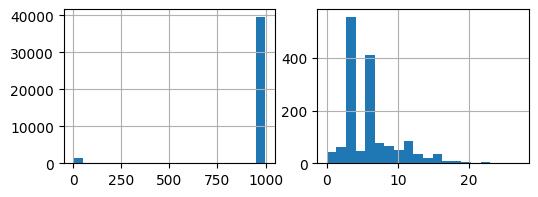

<AxesSubplot: >

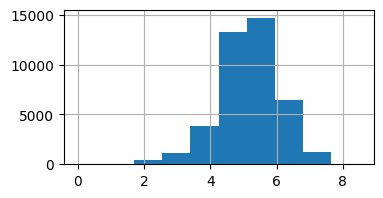

In [10]:
# Histograms for numerical variables
cols = np.delete(data.columns.values, np.where(data.columns.values=='pdays'))

hists = data[cols].hist(figsize=(10,6), bins=20)
plt.tight_layout()
plt.show()

# hist for "pdays" feature where including/exluding 999 values
fig, axes = plt.subplots(1,2, figsize=(6,2))
data.pdays.hist(bins=20, ax=axes[0])
data[data.pdays != 999].pdays.hist(bins=20, ax=axes[1])
plt.show()

# hist for log(duration)
data.duration.apply(lambda x: np.log(x+1)).hist(figsize=(4,2))


**From histograms we observe that:** 

- __y__ - Out of the total calls that are made, 11.3 % of them are successful and result into client opening a term deposit.
- __age__ - Majority of the clients fall in age range of 20 - 60 years old (97.5%).
- __job__ - Majority of the clients are employed in admin, blue-collar, technician and services job types.
- __education__ - Majority of clients have completed university degree & high school, followed by basic 9y, professional course and basic.4y. For 1730 clients, education status is unknown.
- __marital__ - Majority of people fall under single or 
- __duration__ - duration was heavily concentrated until 400s. Log scale has been used for better understanding of the trend. Majority of the call duration lies in range 50 to 800 secs.
- __poutcome__ - Previous campaign outcome is known for 13.6% of the customers. 3.3% of previous outcomes were - successful. It will be interesting to know how likely it is for an existing customer to agree to open a new deposit account.
- __emp.var.rate__ - The distribution for Employment Variation Rate seems to be bimodal i.e. below -0.2 and above -0.2. Majority of the calls were made when the emp.var.rate	 was more than -0.2.
- __euribor3m3m__ - Distribution for Euribor 3 month rate is divided into two parts i.e. one below 2 and one above 3.5. Majority of the calls were made when euribor3m is above 3.5
- __cons_price_ix__ - bimodal distribution.
- __pdays__ - Most of clients was not previously contacted (most 'pdays'=999)



In [11]:
# Build correlation matrix
corr = data.corr().style.set_precision(3).background_gradient(cmap='PuBu')
display(corr)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000,-0.001,0.005,-0.034,0.024,-0.000,0.001,0.129,0.011,-0.018,0.030
duration,-0.001,1.000,-0.072,-0.048,0.021,-0.028,0.005,-0.008,-0.033,-0.045,0.405
campaign,0.005,-0.072,1.000,0.053,-0.079,0.151,0.128,-0.014,0.135,0.144,-0.066
pdays,-0.034,-0.048,0.053,1.000,-0.588,0.271,0.079,-0.091,0.297,0.373,-0.325
previous,0.024,0.021,-0.079,-0.588,1.000,-0.421,-0.203,-0.051,-0.455,-0.501,0.230
emp.var.rate,-0.000,-0.028,0.151,0.271,-0.421,1.000,0.775,0.196,0.972,0.907,-0.298
cons.price.idx,0.001,0.005,0.128,0.079,-0.203,0.775,1.000,0.059,0.688,0.522,-0.136
cons.conf.idx,0.129,-0.008,-0.014,-0.091,-0.051,0.196,0.059,1.000,0.278,0.101,0.055
euribor3m,0.011,-0.033,0.135,0.297,-0.455,0.972,0.688,0.278,1.000,0.945,-0.308
nr.employed,-0.018,-0.045,0.144,0.373,-0.501,0.907,0.522,0.101,0.945,1.000,-0.355


** From correlation matrix we observe next:** 
* most correlated with target feature is call duration. So we need to transform it to reduce the influence
* higly correlated features (employment rate, consumer confidence index, consumer price index) may describe clients state from different social-economic angles. Their variance might support model capacity for generalization.
* also note that this only shows linear correlation and there might be some hidden non-linear relationships.


Text(0.5, 1.0, 'Correlation in Euribor and No. of Employees')

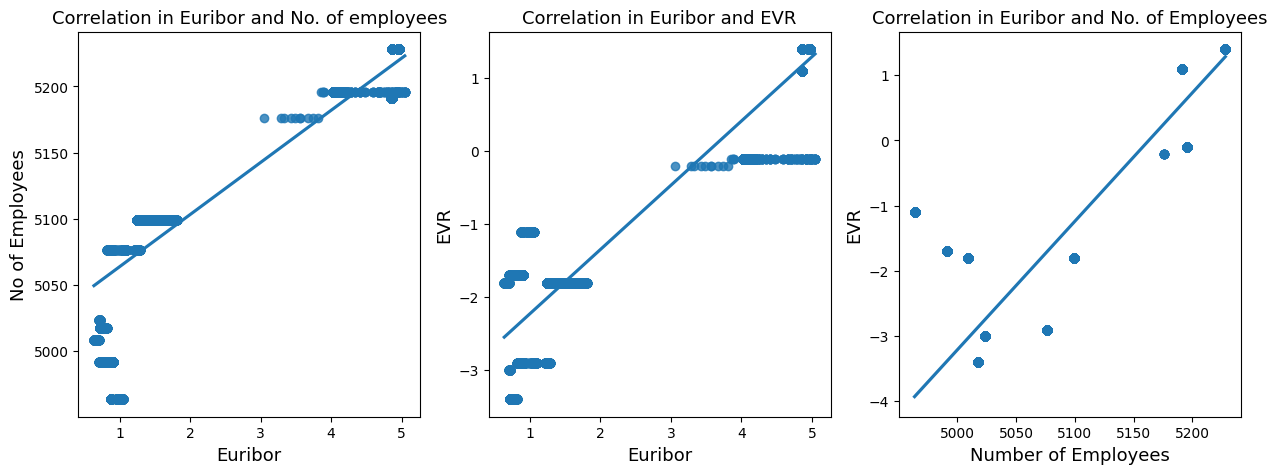

In [12]:
plt.figure(figsize = [15, 5])
font = {'fontsize':'13', 'family': 'sans'}

# left plot: euribor3m vs nr.employed	
plt.subplot(1, 3, 1)
sns.regplot(data = data, x = 'euribor3m', y = 'nr.employed')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('No of Employees', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of employees', fontdict = font);

# middle plot: euribor3m vs emp.var.rate	
plt.subplot(1, 3, 2)
sns.regplot(data = data, x = 'euribor3m', y = 'emp.var.rate')
plt.xlabel('Euribor', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and EVR', fontdict = font);

# right plot: nr.employed vs emp.var.rate	
plt.subplot(1, 3, 3)
sns.regplot(data = data, x = 'nr.employed', y = 'emp.var.rate')
plt.xlabel('Number of Employees', fontdict = {'fontsize':'13', 'family': 'sans'})
plt.ylabel('EVR', fontdict = {'fontsize':'13', 'family': 'sans'});
plt.title('Correlation in Euribor and No. of Employees', fontdict = font)

**It seems conclusive that there is a strong correlation in EVR, euribor and no_emp with each other.**
Also, when euribor is less than 2, EVR is always less than -1. Similarly, when euribor is more than 3, EVR is always more than 0.5.